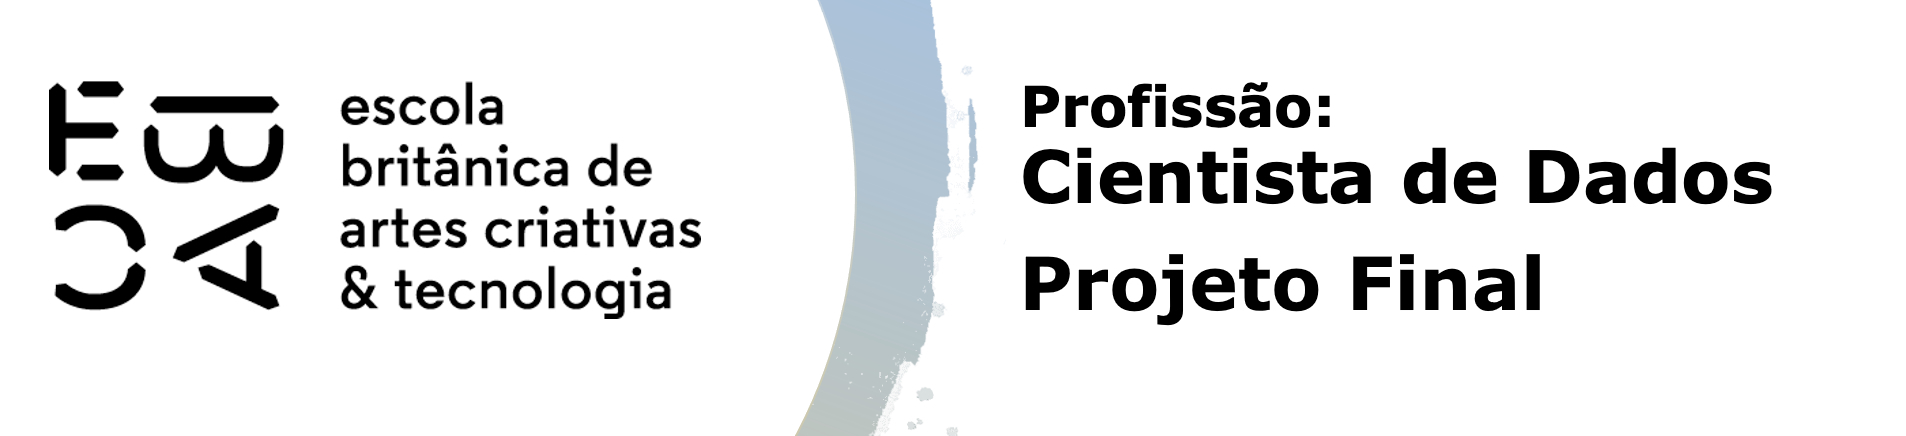

<hr>

# **Analise exploratória univariada**

Nessa etapa será realizada a análise univariada das variáveis, visando resumir e descrever as características de cada uma delas dentro do conjunto de dados, sem levar em consideração a relação de uma variável com as outras. Será feita uma análise sobre informações básicas das variáveis, como média, mediana, moda, distribuição de frequência, entre outras medidas dependo do tipo de variável, qualitativa ou quantitativa.

## Variáveis binárias

Primeiramente, será analisada a distribuição das variáveis binárias, aquelas variáveis correspondentes as características dos imóveis, opções e comodidades.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from classes.PandasExtension import PandasExtension
from classes.utils import write_object
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Carregando a base de dados
df = pd.read_feather('./dataset/aluguel_rio_analise_univariada.feather')

In [3]:
# criando uma lista com o nome das variáveis binárias 
binarias = list(set(df.select_dtypes(include=['int64']).columns) - set([
    'valor', 
    'vagas', 
    'condominio', 
    'quartos', 
    'metro_quadrado', 
    'banheiros', 
    'andar', 
    'iptu'
]))

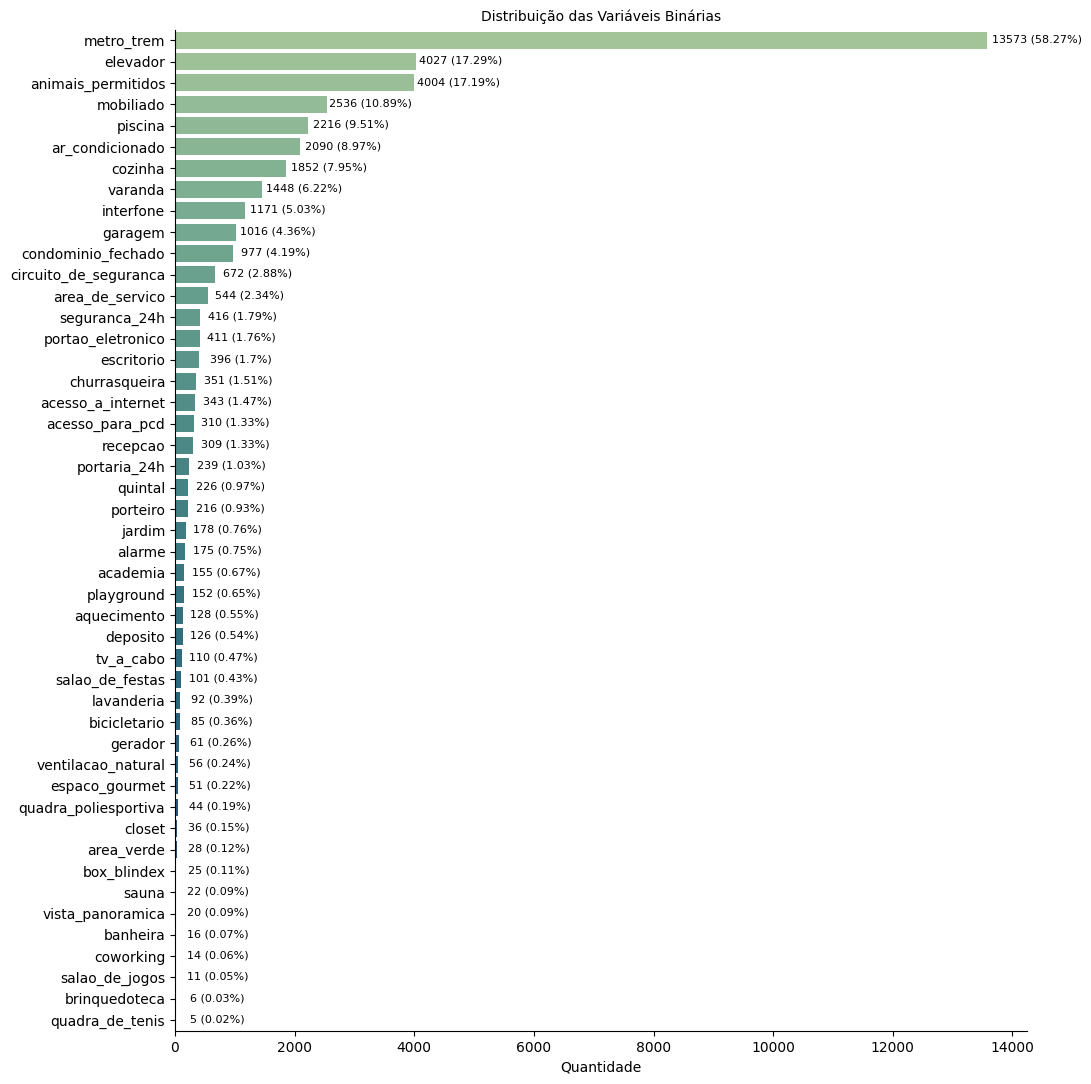

In [4]:
# função para o cálculo do percentual correspondente de cada variável 
f = lambda x: round((x / df.shape[0]) * 100, 2)

# cria um DataFrame com a soma de todos os valores para cada variável
d = pd.DataFrame(df[binarias].sum(), columns=['quantidade'])
d['percentual'] = f(d['quantidade'])
d.sort_values('quantidade', ascending=False, inplace=True)

# cria um gráfico de barras para exibir a contagem das variáveis
fig, ax = plt.subplots(1, 1, figsize=(11, 13))
sns.barplot(x='quantidade', y=d.index, data=d, ax=ax, palette="crest", hue=d.index, legend=False)
sns.despine(fig=fig, ax=ax, top=True, right=True, left=False, bottom=False)
ax.set(xlabel='Quantidade', ylabel='')
ax.set_title('Distribuição das Variáveis Binárias', fontsize=10)

# exibe no gráfico a quantidade e percentual de cada variável
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        ax.text(width + 700 + width*0.01, bar.get_y()+0.1 + bar.get_height()/2, f"{int(width)} ({f(int(width))}%)", ha="center", fontsize=8)

<div style="border: 1px solid #88AB8E; background-color: #ECF4E3; padding: 10px; border-radius: 5px;">
Se considerarmos as variáveis mais representativas aquelas com 10% ou mais, podemos deduzir que se tratam de características procurardas em imoveis residenciais ou comerciais. Fácil acesso ao transporte público, através de estações de metro ou trem, demonstra a importância da mobilidade urbana na hora de escolher um local alugar. A presença de elevador se destaca como uma característica valorizada, principalmente em edifícios com vários andares, proporcionando conforto e acessibilidade. Já a permissividade de animais de estimação atende à demanda de uma parcela significativa da população que busca um lar para seus pets. Por fim, os imóveis mobiliados também apresentam uma procura considerável, facilitando a vida daqueles que estão em processo de mudança ou que não possuem mobília própria ou de escritórios comerciais prontos para implantação do negócio. Podemos considerar que essas são fortes candidatas a variáveis preditoras do modelo que será criado.

<br>
<br>

Outras variáveis, como quadra de tênis, salão de jogos, coworking ou área verde, por exemplo, possuem pouquíssimos registros. Poderíamos até mesmo sugerir a exclusão desses registros, mas por se tratarem de características muito específicas, podem estar relacionadas a um tipo de imóvel específico, talvez até mesmo a um bairro específico. Assim, é preciso confrontar essas variáveis com outras para se ter certeza de que elas podem ou não serem utilizadas.
</div>

## Variável bairro
Nome do bairro onde o imóvel está localizado

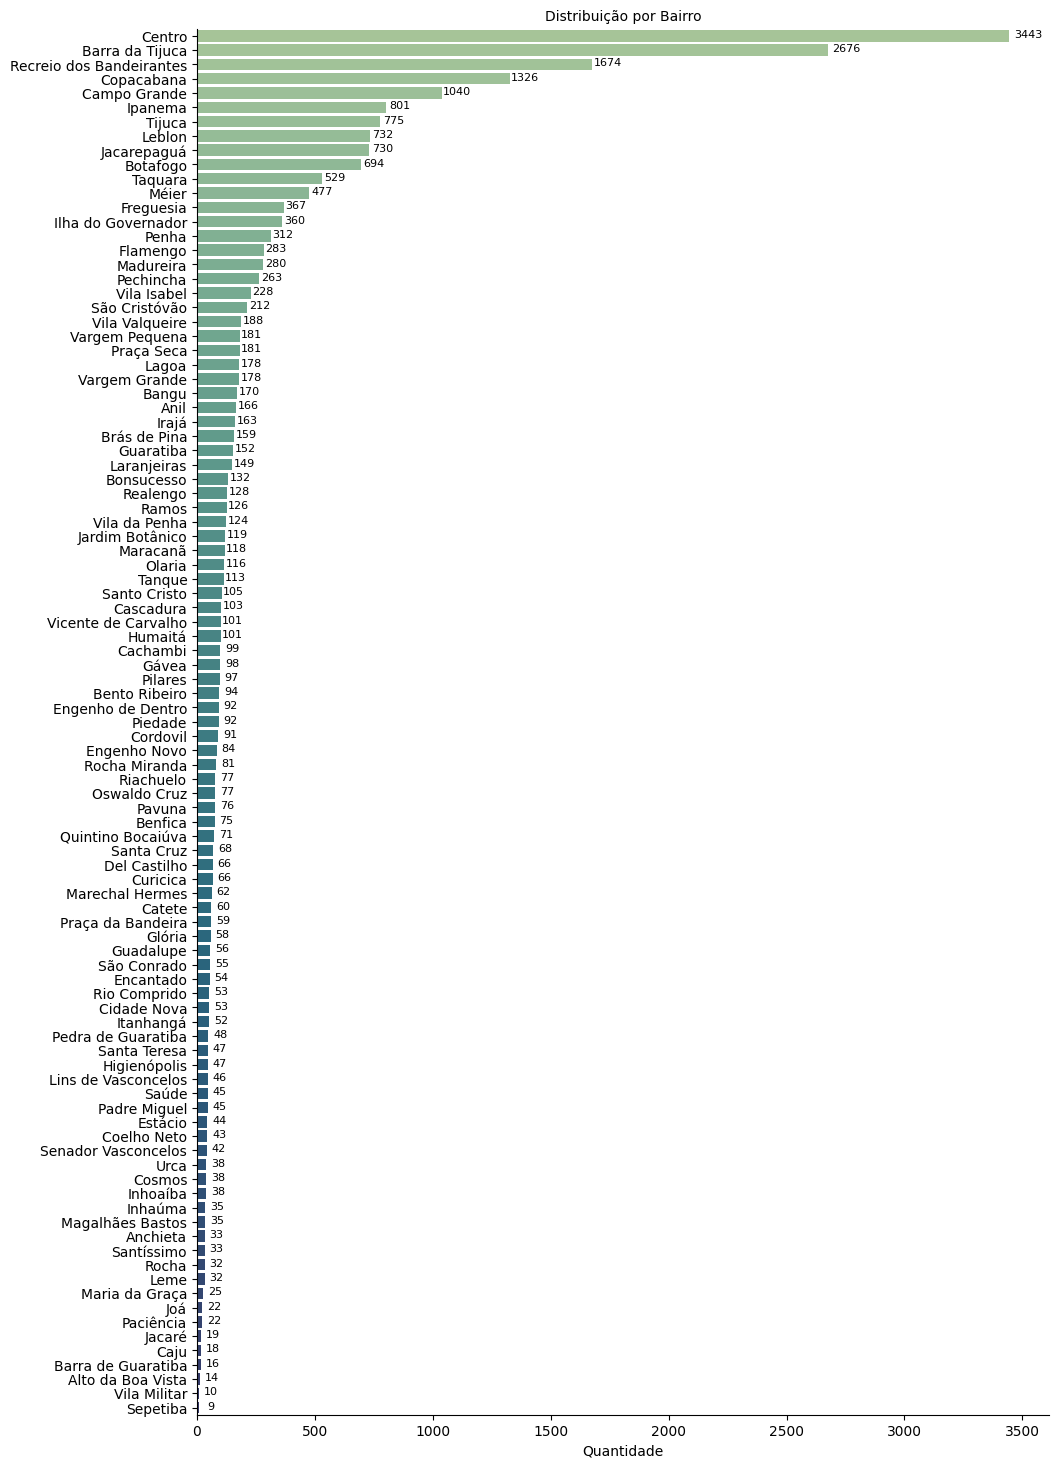

In [5]:
# cria um DataFrame com a soma de todos registros por bairro
d = pd.DataFrame(df['bairro'].value_counts())
d.sort_values('count', ascending=False, inplace=True)

# cria um gráfico de barras para exibir a contagem por bairro
fig, ax = plt.subplots(1, 1, figsize=(11, 18))
sns.barplot(x='count', y=d.index, data=d, ax=ax, palette="crest", hue=d.index, legend=False)
sns.despine(fig=fig, ax=ax, top=True, right=True, left=False, bottom=False)
ax.set(xlabel='Quantidade', ylabel='')
ax.set_title('Distribuição por Bairro', fontsize=10);

# exibe no gráfico a quantidade e percentual de cada variável
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        ax.text(width + 50 + width*0.01, bar.get_y()+0.1 + bar.get_height()/2, f"{int(width)}", ha="center", fontsize=8)

<div style="border: 1px solid #88AB8E; background-color: #ECF4E3; padding: 10px; border-radius: 5px;">
Em termos de tipologia, podemos destacar que no <b>Centro</b> predominam prédios de escritórios, bancos, lojas e restaurantes que atendem à intensa atividade comercial e financeira da região. Também é presença marcante de edifícios governamentais, sedes de órgãos públicos e instituições culturais.
    <br><br>
A tipologia dos imóveis nos outros bairros com mais registros, como Barra da Tijuca, Recreio dos Bandeirantes, Copacabana, Ipanema e Campo Grande, pode variar de acordo com o perfil e as características de cada um. Na <b>Barra da Tijuca</b>, condomínios horizontais com casas amplas se destacam, enquanto <b>Copacabana e Ipanema</b> oferecem apartamentos em edifícios imponentes, desde studios até coberturas luxuosas. Já o <b>Recreio dos Bandeirantes</b> se caracteriza por condomínios horizontais com foco em casas, proporcionando um estilo de vida tranquilo à beira-mar. <b>Campo Grande</b>, por sua vez, apresenta uma diversidade de tipologias, com apartamentos, casas e imóveis comerciais em um bairro em constante expansão, tudo a preços mais acessíveis.
</div>

## Variável tipo
Tipo do imóvel: casa, apartamento, sala comercial, etc

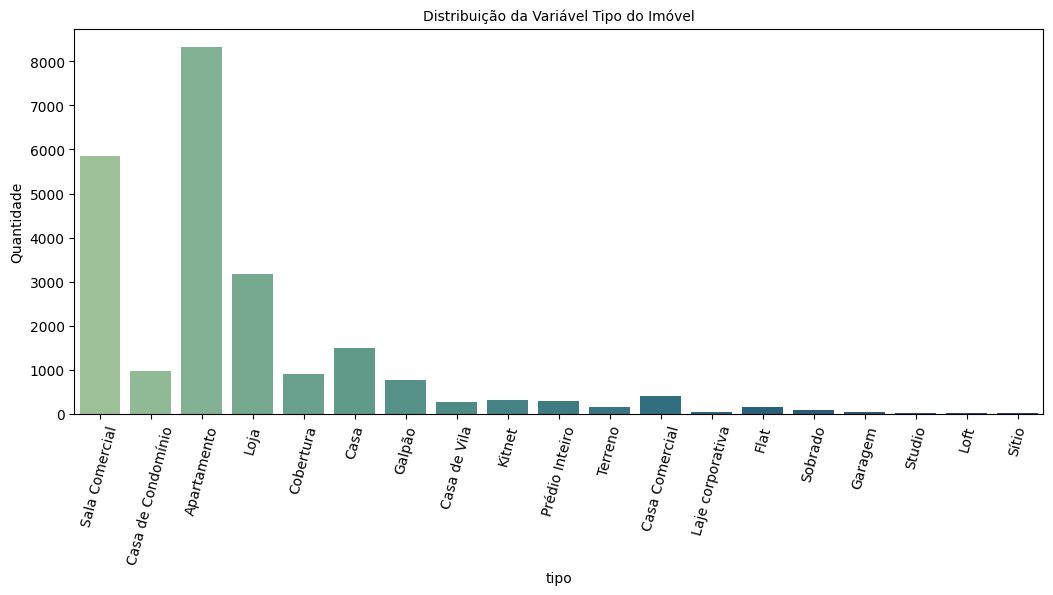

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12.5, 5))
sns.countplot(x='tipo', data=df, ax=ax, palette="crest", hue='tipo', legend=False)
ax.tick_params(axis='x', rotation=75)
ax.set(ylabel='Quantidade')
ax.set_title('Distribuição da Variável Tipo do Imóvel', fontsize=10);

<div style="border: 1px solid #88AB8E; background-color: #ECF4E3; padding: 10px; border-radius: 5px;">
A grande quantidade de imóveis do tipo Sala Comercial e Apartamento pode ser explicada pelos bairros Centro e Copacabana ou Ipanema, bairros que concentram esses tipos de imóveis. É preciso analisar os registros referentes a Casa e Casa de Condomínio em conjunto com a variável <u>condominio</u>. Essa variável pode confirmar se uma casa é de fato de Condomínio ou não, podendo ser reclassificados dependendo do caso.
</div>

## Variável andar
Indica o número do andar do imóvel

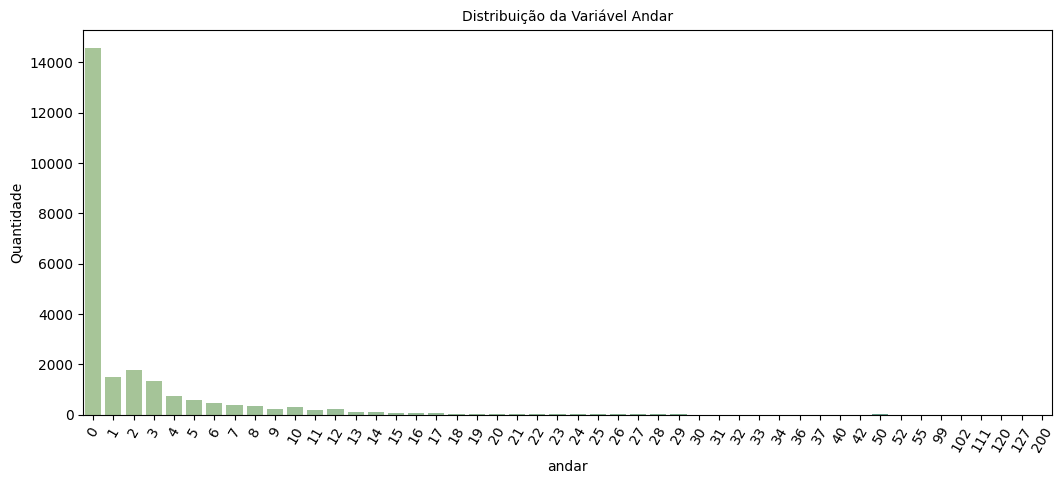

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12.5, 5))
sns.countplot(x='andar', data=df, ax=ax, palette="crest", hue='andar', legend=False)
ax.tick_params(axis='x', rotation=60)
ax.set(ylabel='Quantidade')
ax.set_title('Distribuição da Variável Andar', fontsize=10);

<div style="border: 1px solid #88AB8E; background-color: #ECF4E3; padding: 10px; border-radius: 5px;">
Essa variável possui vários pontos de atenção que devem ser analisados posteriormente em conjunto com outras variáveis: 
<ol>
<li>Podemos verificar que a maioria dos registros são de imóveis térreos, provavelmente casas residenciais ou estabelecimentos comerciais de rua.</li>
    
<li>Imóveis térreos são imóveis constituídos de apenas 1 pavimento. No gráfico, podemos ver que a maioria dos registros possui 0 (zero) andares, o que pode representar esse tipo de imóvel. É preciso analisar os registros que possuem 1 andar, com o propósito de verificar que realmente se tratam de imóveis térreos ou 1 pavimento acima.</li>

<li>Segundo a <a href="https://engenhariacivilfsp.wordpress.com/wp-content/uploads/2014/09/aula-nbr-12721_2006.pdf" style="color: #4800FF">Norma Brasileira (NRB) 12721, item 3.5</a>, andar é o pavimento que está acima ou abaixo do pavimento térreo, podendo receber diferentes nomenclaturas, a serem especificadas no respectivo projeto arquitetônico, tais como mezanino, sobreloja, andar-tipo, sub-loja, subsolo etc.</li>

<li>
Existem andares superiores a 100. Não existem prédios dessa magnitude na cidade. É preciso verificar esses registros conforme o tipo do imóvel. Provavelmente esse campo no cadastro do imóvel foi utilizado para representar o andar e número do apartamento ou sala, por exemplo: 205 para o segundo andar, número 5.
</li>

</ol>
</div>

## Variável banheiros
Quantidade de banheiros no imóvel

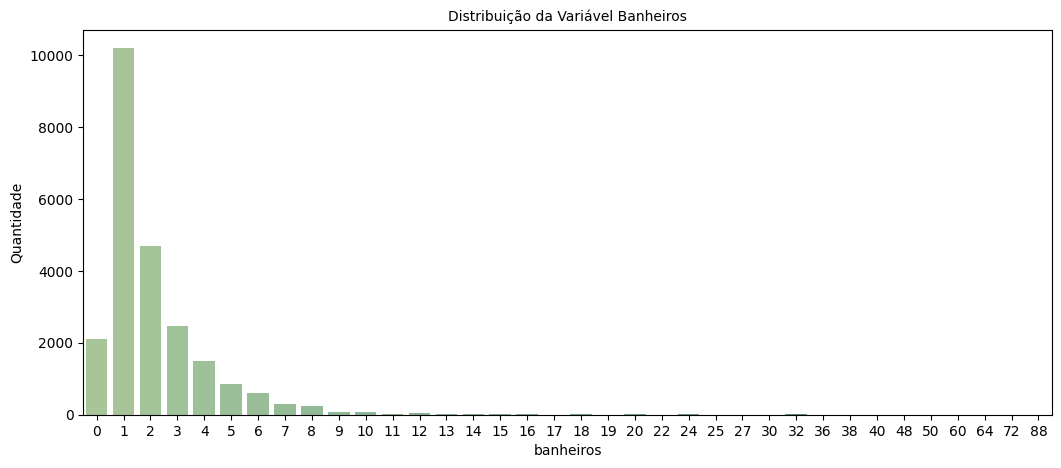

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12.5, 5))
sns.countplot(x='banheiros', data=df, ax=ax, palette="crest", hue='banheiros', legend=False)
ax.set(ylabel='Quantidade')
ax.set_title('Distribuição da Variável Banheiros', fontsize=10);

<div style="border: 1px solid #88AB8E; background-color: #ECF4E3; padding: 10px; border-radius: 5px;">

Observa-se uma concentração significativa de imóveis com 1 ou 2 banheiros, representando juntos aproximadamente de 75% do total. Isso indica que a maioria dos imóveis na base se encaixa nesse padrão.


À medida que a quantidade de banheiros aumenta, a frequência de imóveis com essa característica diminui gradativamente. Isso significa que imóveis com 3 ou mais banheiros são menos comuns.

É importante salientar que o gráfico também mostra a existência de imóveis com diversas quantidades de banheiros, desde 0 até 88. No entanto, a frequência desses imóveis é consideravelmente menor em comparação com aqueles que possuem 1 ou 2 banheiros. A ausência de banheiros pode estar relacionada ao tipo de imóvel, como galpão ou garagem, por exemplo.

</div>

## Variável quartos
Quantidade de quartos no imóvel

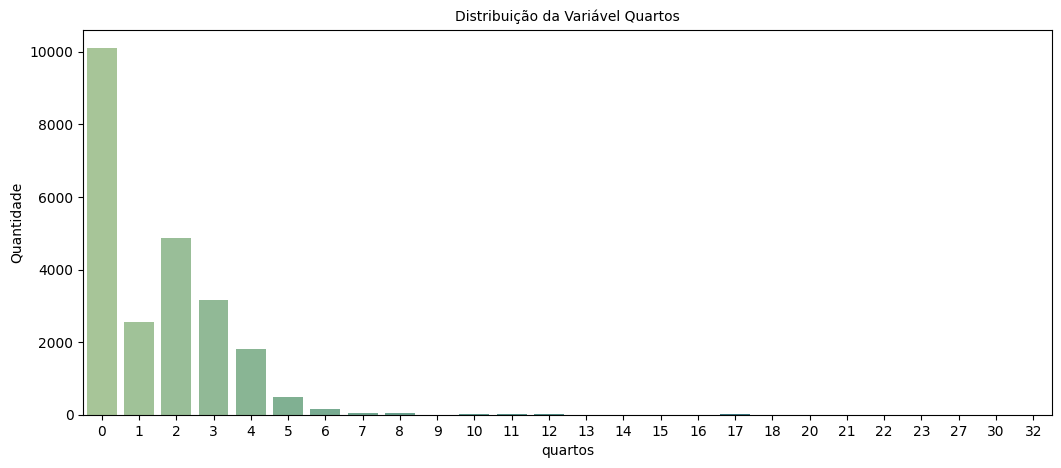

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12.5, 5))
sns.countplot(x='quartos', data=df, ax=ax, palette="crest", hue='quartos', legend=False)
ax.set(ylabel='Quantidade')
ax.set_title('Distribuição da Variável Quartos', fontsize=10);

<div style="border: 1px solid #88AB8E; background-color: #ECF4E3; padding: 10px; border-radius: 5px;">

Observa-se uma concentração expressiva de imóveis com 2 quartos, representando aproximadamente de 35% do total. Isso indica que a maioria dos imóveis na base se encaixa nesse padrão.

À medida que a quantidade de quartos aumenta, a frequência de imóveis com essa característica diminui gradativamente. Isso significa que imóveis com 3 ou mais quartos são menos comuns.

É importante observar que o gráfico também mostra a existência de imóveis com diversas quantidades de quartos, desde 0 até 32, o que pode estar relacionado ao tipo de imóvel.

</div>

## Variável vagas
Quantidade de vagas de garagem

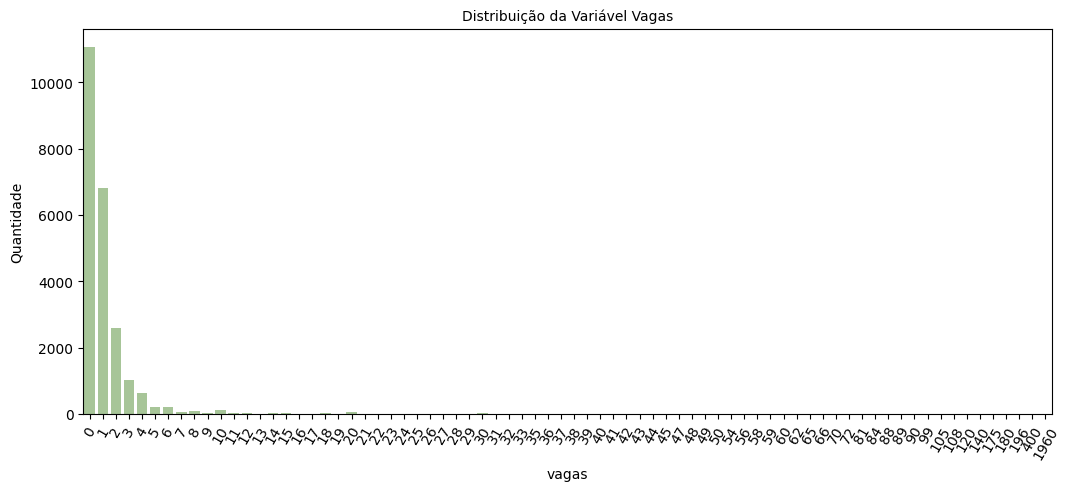

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12.5, 5))
sns.countplot(x='vagas', data=df, ax=ax, palette="crest", hue='vagas', legend=False)
ax.tick_params(axis='x', rotation=60)
ax.set(ylabel='Quantidade')
ax.set_title('Distribuição da Variável Vagas', fontsize=10);

<div style="border: 1px solid #88AB8E; background-color: #ECF4E3; padding: 10px; border-radius: 5px;">

Podemos observar que a maioria dos imóveis na base não possui vagas de garagem. Isso pode ser explicado pelo tipo do imóvel, como sala comercial ou apartamento, dependendo também da localização do imóvel. Também podemos observar que existem imóveis com mais de 100 vagas de garagem. Essa discrepância também pode ser observada na variável <u>banheiros</u>. É preciso comparar essa variável com outras da base de dados para verificar possíveis erros.


</div>

## Variável metro quadrado
Metragem do imóvel em metros quadrados

In [11]:
desc = pd.DataFrame(df['metro_quadrado'].describe()); desc

,metro_quadrado
count,2.329500e+04
mean,4.325836e+02
std,1.332190e+04
min,0.000000e+00
25%,4.500000e+01
50%,8.000000e+01
75%,1.980000e+02
max,1.410630e+06


<div style="border: 1px solid #88AB8E; background-color: #ECF4E3; padding: 10px; border-radius: 5px;">

A mediana (80 m²) ser maior que a média (43 m²) indica que a distribuição dos dados é assimétrica à direita. Ou seja, há mais imóveis com metragens menores que a média, enquanto os valores extremos superiores contribuem significativamente para elevar a média. O desvio padrão elevado (13.322 m²) demonstra grande dispersão dos valores em torno da média. Isso significa que os imóveis apresentam metragens bastante distintas entre si. A diferença entre o valor máximo (1.410.630 m²) e o mínimo (0 m²) evidencia a ampla faixa de metragens presentes na base de dados. Os quartis (25%, 50% e 75%) indicam que a maioria dos imóveis (75%) possui metragem entre 45 m² e 198 m². É importante considerar o contexto da base de dados e os objetivos da análise ao interpretar os resultados. Valores extremos como 1.410.630 m² podem ser considerados outliers e ter impacto na análise geral.

</div>

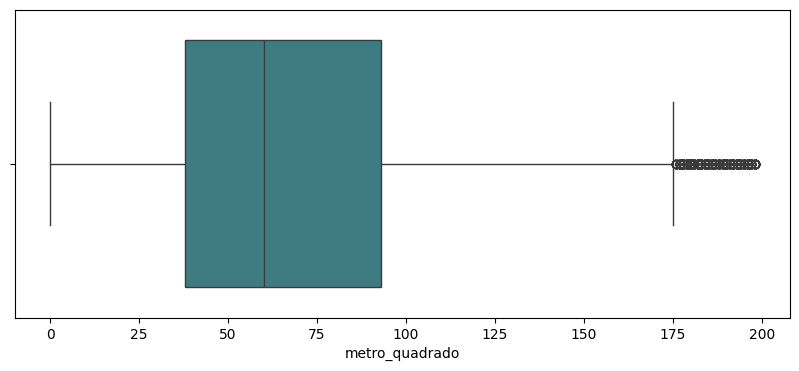

In [12]:
limite = desc['metro_quadrado']['75%']
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.boxplot(x='metro_quadrado', data=df.query('metro_quadrado <= @limite'), palette="crest", ax=ax);

<div style="border: 1px solid #88AB8E; background-color: #ECF4E3; padding: 10px; border-radius: 5px;">

O gráfico boxplot acima foi feito usando apenas os registros com metro quadrado até 75% da distribuição. Nele podemos ver a concentração dos imóveis  por metro quadrado e a assimétrica à direita.

</div>

Abaixo serão analisados os tipos de imóveis com metro quadrado igual a zero e também aqueles metro quadrado muito acima da média

In [13]:
# tipos de imóveis com metro quadrado igual a zero
metro_zero = df.query('metro_quadrado == 0')
(PandasExtension(metro_zero)).print_column('tipo')

Galpão
Garagem
Laje corporativa
Loja
Sala Comercial
Terreno


In [14]:
# imóveis com metro quadrado superiores a 100.000
metro_superior = df.query('metro_quadrado >= 100000')
metro_superior[['bairro', 'valor', 'metro_quadrado', 'tipo']]

,bairro,valor,metro_quadrado,tipo
id,,,,
19827,Cidade Nova,70531,1410630,Laje corporativa
23103,Bento Ribeiro,7500,1298810,Galpão
29427,Coelho Neto,1100,200000,Casa
31218,Vargem Pequena,9500,600000,Casa de Condomínio


<div style="border: 1px solid #88AB8E; background-color: #ECF4E3; padding: 10px; border-radius: 5px;">

Existem tipos diferentes de imóveis entre aqueles com metro quadrado igual a zero. Considerando que essa é uma variável importe para a análise, podemos descartar esses registros. Entre os imóveis com metro quadrado superiores a 100.000, temos uma casa com 200.000 metros quadrados. Para efeito de comparação, todo o complexo <a href="https://pt.wikipedia.org/wiki/Est%C3%A1dio_Jornalista_M%C3%A1rio_Filho" style="color: blue">Maracanã</a> na cidade do Rio de Janeiro possui cerca de 200.000 metros quadrados. Assim, podemos considerar esses registros como outliers e eles também podem ser descartados.



</div>

In [15]:
df.drop(metro_zero.index, inplace=True)
df.drop(metro_superior.index, inplace=True)

## Variável valor
Valor cobrado pelo aluguel

In [16]:
desc_val = pd.DataFrame(df['valor'].describe()); desc_val

,valor
count,2.321300e+04
mean,1.213123e+04
std,1.325130e+05
min,1.000000e+02
25%,1.200000e+03
50%,3.000000e+03
75%,9.000000e+03
max,1.927716e+07


<div style="border: 1px solid #88AB8E; background-color: #ECF4E3; padding: 10px; border-radius: 5px;">

A distribuição dos valores de aluguel é assimétrica à direita. O desvio padrão é alto, indicando que há uma grande dispersão dos valores de aluguel em torno da média. O valor máximo do aluguel é extremamente alto e pode ser um outlier, distorcendo a média e o desvio padrão. É recomendável analisar esse valor com mais cuidado para verificar se ele representa um caso real ou um erro na coleta de dados.

Os dados indicam que o valor médio do aluguel dos imóveis na base de dados é de R$ 12.118,18, mas há uma grande variação entre os valores, com imóveis que variam de R\\$ 100,00 a R\\$ 19.277.160,00. É importante considerar essa variabilidade ao analisar os dados e tomar decisões sobre o valor do aluguel de um imóvel.

</div>

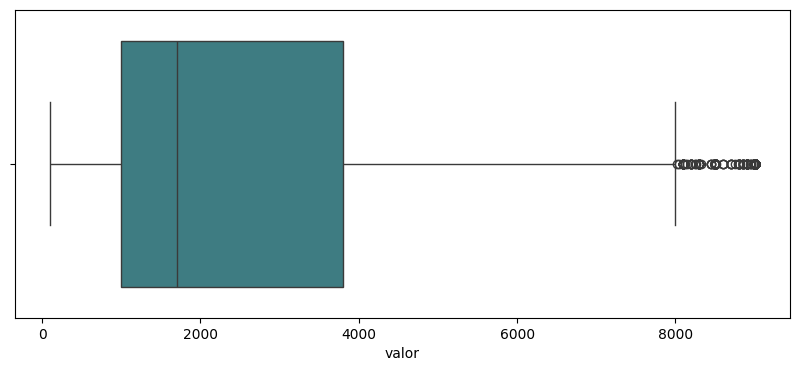

In [17]:
limite_valor = desc_val['valor']['75%']
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.boxplot(x='valor', data=df.query('valor <= @limite_valor'), palette="crest", ax=ax);

<div style="border: 1px solid #88AB8E; background-color: #ECF4E3; padding: 10px; border-radius: 5px;">

O gráfico boxplot acima foi feito usando apenas os registros com metro quadrado até 75% da distribuição. Nele podemos ver a concentração dos imóveis  por valor cobrado por aluguel e a assimétrica à direita.

</div>

## Conclusão

Entre as características que mais se destacam entre os imóveis residenciais ou comerciais, podemos destacar aquelas que oferecem maior mobilidade e conforto. As características com menor quantidade de registros, devem ser avaliadas em conjunto com outras variáveis por serem muito específicas.


Os bairros com maior oferta de imóveis são aqueles localizados em bairros com grandes centro comerciais ou residenciais. Esse dados pode justificar uma maior quantidade de registros para imóveis como salas comerciais e apartamentos.

É preciso avaliar a variável andar com relação ao tipo de imóvel. É possível que o cadastro dessa variável tenha sido feito incorretamente.

A variável quartos, banheiros e vagas também devem ser avaliadas em conjunto com outras variáveis. Existe uma divergência muito grande nos valores dessas variáveis.  

As variáveis valor e metro quadrado possuem uma distribuição assimétrica. Também devem ser avaliadas em conjunto com outras variáveis para verificar possíveis outliers.

## Salvando a base de dados <a name="Salvando-a-base-de-dados"></a>

Após o tratamento dos valores ausentes, tipos das variáveis e do tratamento das variáveis do tipo testo, a base de dados já normalizada será gravado em formato feather para que possa ser utilizadas nas etapas seguintes do estudo.



In [18]:
df.to_feather('./dataset/aluguel_rio_analise_bivariada.feather')

A lista com o nome das variáveis binárias também será armazenada para ser utilizada em análises posteriores.

In [20]:
write_object('variaveis', {'binarias' : binarias})